<img src="../../img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">NDVI calculation on images obtained through STAC</span>
<hr style="border:2px solid #0077b9;">

If you haven't installed the [STAC client for Python](https://github.com/brazil-data-cube/stac.py), install it with `pip`:

In [ ]:
!pip install stac.py

For more information on [STAC client for Python](https://github.com/brazil-data-cube/stac.py), see the introductory Jupyter Notebook about the [SpatioTemporal Asset Catalog (STAC)](./stac-introduction.ipynb).

# 1. Load the following Libraries
<hr style="border:1px solid #0077b9;">

In [2]:
import numpy
import rasterio
import stac

from matplotlib import pyplot as plt
from rasterio.windows import Window

# 2. Set the service and search for images
<hr style="border:1px solid #0077b9;">

In [3]:
st = stac.STAC('http://brazildatacube.dpi.inpe.br/stac/')

In [4]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-54.0,-24.0,-53.0,-23.0',
                       'datetime':'2018-08-01/2019-07-31', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16


In [5]:
nir_url = my_search['features'][0]['assets']['BAND16']['href']
nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_BAND16.tif'

In [6]:
red_url = my_search['features'][0]['assets']['BAND15']['href']
red_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_BAND15.tif'

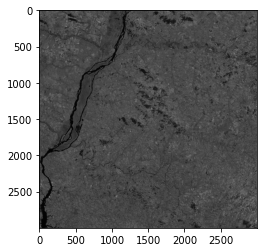

In [7]:
with rasterio.open(nir_url) as dataset:
    nir = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(nir, cmap='gray')

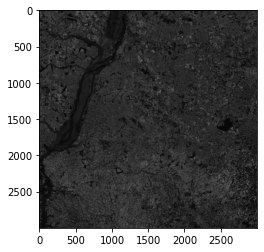

In [8]:
with rasterio.open(red_url) as dataset:
    red = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(red, cmap='gray')

# 3. Calculate Normalized Difference Vegetation Index (NDVI)
<hr style="border:1px solid #0077b9;">

The normalized difference vegetation index (NDVI) is a vegetation index calculated using the Red and Near Infrared band (NIR) measurements. It assess whether or not the target being observed contains live green vegetation and is calculated through the following equation:

<img src="../../img/stac/ndvi.png" width="480" />
<br/>
<b>Figura 1</b> - NDVI Equation.

In [9]:
ndvi = (nir - red)/(nir + red)
ndvi

array([[0.64243281, 0.65598651, 0.66296502, ..., 0.41059931, 0.41537706,
        0.42114385],
       [0.63304843, 0.63932552, 0.65859031, ..., 0.53904874, 0.58369471,
        0.64352941],
       [0.62253695, 0.61416361, 0.56180082, ..., 0.68445023, 0.70952531,
        0.70824261],
       ...,
       [0.54086266, 0.58256496, 0.65815217, ..., 0.39270902, 0.3874098 ,
        0.3655814 ],
       [0.59034823, 0.58679086, 0.6131494 , ..., 0.44818719, 0.45159351,
        0.42044257],
       [0.6458693 , 0.5885947 , 0.55903457, ..., 0.46545455, 0.42865986,
        0.41536458]])

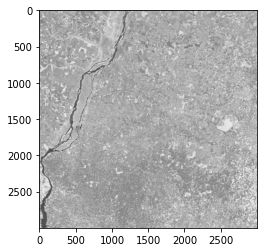

In [10]:
plt.imshow(ndvi, cmap='gray')

In [11]:
ndvi_band_info = my_search['features'][0]['properties']['eo:bands'][7]
ndvi_band_info

{'name': 'BAND14',
 'common_name': 'green',
 'description': None,
 'min': 0.0,
 'max': 10000.0,
 'nodata': -9999.0,
 'scale': 0.0001,
 'center_wavelength': 0.555,
 'full_width_half_max': 0.035,
 'data_type': 'int16'}

In [12]:
ndvi_url = my_search['features'][0]['assets']['NDVI']['href']
ndvi_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_NDVI.tif'

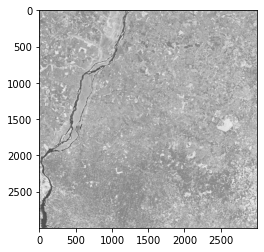

In [13]:
with rasterio.open(ndvi_url) as dataset:
    ndvi_bdc = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(ndvi_bdc, cmap='gray')

In [14]:
ndvi_bdc

array([[6424, 6559, 6629, ..., 4105, 4153, 4211],
       [6330, 6393, 6585, ..., 5390, 5836, 6435],
       [6225, 6141, 5618, ..., 6844, 7095, 7082],
       ...,
       [5408, 5825, 6581, ..., 3927, 3874, 3655],
       [5903, 5867, 6131, ..., 4481, 4515, 4204],
       [6458, 5885, 5590, ..., 4654, 4286, 4153]], dtype=int16)